Saving manusianlangit_8496d15eda5248c7a6019b3ea5790116.jpg to manusianlangit_8496d15eda5248c7a6019b3ea5790116.jpg


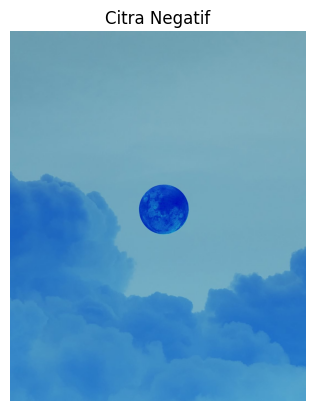

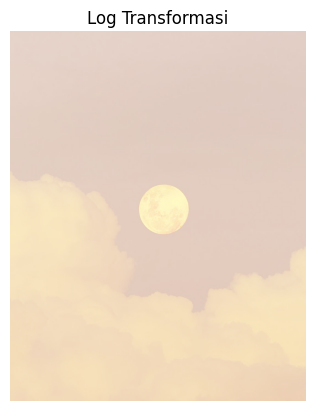

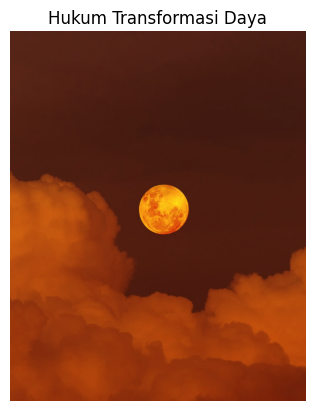

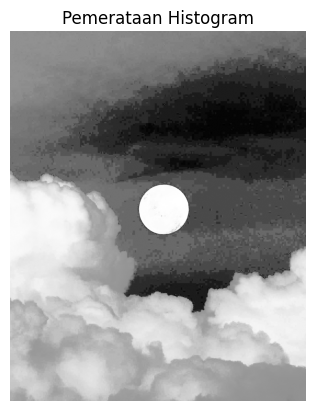

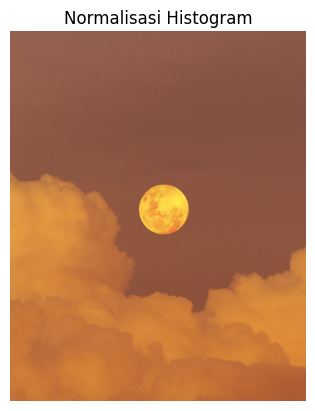

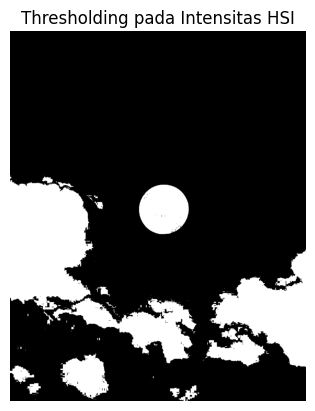

In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

# Upload Image
uploaded = files.upload()

# Load Image from Uploaded File
for filename in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[filename]))
    image = np.array(image)

# Convert to RGB if not already
if image.shape[-1] == 4:
    image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)

# 1. Citra Negatif
negative_image = 255 - image

# Tampilkan Citra Negatif
plt.imshow(negative_image)
plt.title('Citra Negatif')
plt.axis('off')
plt.show()

# 2. Log Transformasi
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(1 + image.astype(np.float64)))
log_image = np.uint8(log_image)

# Tampilkan Log Transformasi
plt.imshow(log_image)
plt.title('Log Transformasi')
plt.axis('off')
plt.show()

# 3. Hukum Transformasi Daya (Gamma)
gamma = 2.0
gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype='uint8')

# Tampilkan Gamma Transformasi
plt.imshow(gamma_corrected)
plt.title('Hukum Transformasi Daya')
plt.axis('off')
plt.show()

# 4. Pemerataan Histogram (Grayscale)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

# Tampilkan Pemerataan Histogram
plt.imshow(equalized_image, cmap='gray')
plt.title('Pemerataan Histogram')
plt.axis('off')
plt.show()

# 5. Normalisasi Histogram
norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Tampilkan Normalisasi Histogram
plt.imshow(norm_image)
plt.title('Normalisasi Histogram')
plt.axis('off')
plt.show()

# 6. Konversi RGB ke HSI
def rgb_to_hsi(image):
    image = image.astype(np.float64) / 255
    r, g, b = cv2.split(image)
    intensity = (r + g + b) / 3
    min_rgb = np.minimum(np.minimum(r, g), b)
    saturation = 1 - (3 / (r + g + b + 1e-10)) * min_rgb
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-10
    theta = np.arccos(num / den)
    hue = np.where(b > g, 2 * np.pi - theta, theta)
    hue = hue / (2 * np.pi)
    hsi_image = cv2.merge([hue, saturation, intensity])
    return hsi_image

hsi_image = rgb_to_hsi(image)

# Thresholding pada Komponen Intensitas
threshold = 0.5
binary_mask = (hsi_image[:, :, 2] > threshold).astype(np.uint8) * 255

# Tampilkan Thresholding HSI
plt.imshow(binary_mask, cmap='gray')
plt.title('Thresholding pada Intensitas HSI')
plt.axis('off')
plt.show()